План лекции:
- Более интутивное определение Loss-функции. Эмпирический риск.
- Кросс-энтропия в логистической регрессии
- Softmax-регрессия. Кросс-энтропия
- Максимальное правдоподобие
- Метрики классификации
- Деление выборки, кросс-валидация, выбор модели

Пусть $X$ - множество объектов (экземпляров данных). $Y$ - множество допустимых ответов.
У нас есть множество образцов (прецедентов)
$$(x_1,y_1), (x_2,y_2),...(x_n,y_n);~~x_i \in X, y_i \in Y$$

Наша задача - найти функцию-гипотезу $h(x)$, такую, чтобы приблизить зависимость, описанную в парах $(x_1,y_1), (x_2,y_2),...(x_n,y_n)$

Функция потерь $L(x,y;h)$ - это функция, характеризующая на произвольном образце $(x,y)$ отклонение ответа $h(x)$, полученного при помощи гипотезы $h$, от истинного ответа $y$.

Пример функции потерь:
$$L(x,y;h) = (h(x) - y)^2$$
$$L(x,y;h) = |h(x) - y|$$

**Эмпирическим риском** называется среднее значение функции потерь на множестве образцов, использующихся для обучения модели (обучающей выборки)
$$Q(h,X) = \frac{1}{n}\sum_{i=1}^n L(y_i, h(x_i))$$

### Метод максимального правдоподобия для supervised learning

Чтобы применить метод максимального правдоподобия необходимо, чтобы ваша модель (гипотеза) давала не точный ответ, а распределение вероятностей над ним.
Вернёмся к нашей выборке
$$(x_1,y_1), (x_2,y_2),...(x_n,y_n);~~x_i \in X, y_i \in Y$$

Вероятностная модель $h$ принимает на вход экземпляр $x$ и выдаёт распределение $P_h(Y|x)$ над ответом. Для задач классификации это дискретное распределение. Допустим, у нас 3 класса. Тогда:
$$P_h(Y|x) = \{P(Y=1|x), P(Y=2|x), P(Y=3|x)\} = \{P(1|x), P(2|x), P(3|x)\}$$

Представим таблицу с истинными ответами и предсказанным распределением:

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x1 = np.random.normal(0,scale=2,size=50)
x2 = np.random.normal(0,scale=1, size=50)

In [4]:
cs = np.zeros(len(x1),dtype=np.int)

In [5]:
cs[x2>0.8] = 1
cs[x1 - x2 > 1] = 2

<AxesSubplot:>

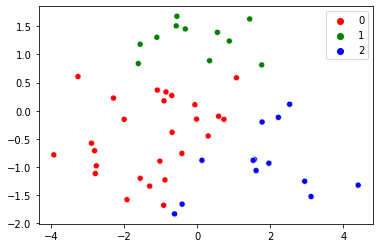

In [6]:
sns.scatterplot(x=x1,y=x2,hue=cs, palette=['red','green', 'blue'])

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
X = np.column_stack([x1,x2])

In [9]:
clf = LogisticRegression()
clf.fit(X,cs)

LogisticRegression()

In [10]:
y_pred = clf.predict(X)

In [11]:
xx1,xx2 = np.mgrid[x1.min():x1.max():50j,x2.min():x2.max():50j]

In [12]:
from matplotlib.colors import ListedColormap

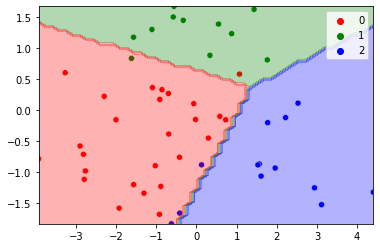

In [13]:
sns.scatterplot(x=x1,y=x2,hue=cs, palette=['red','green', 'blue'])
plt.contourf(xx1,xx2,
             clf.predict(np.column_stack((xx1.ravel(),xx2.ravel()))).reshape(xx1.shape),
             alpha=0.3, cmap=ListedColormap(['red','green', 'blue']))

In [14]:
probs = clf.predict_proba(X)

In [15]:
pred_df = pd.DataFrame({"x1":X[:,0],
                        "x2": X[:,1],
                        "class": cs,
                        "p_0":probs[:,0],
                        "p_1": probs[:,1],
                        "p_2": probs[:,2]})

In [16]:
pred_df.sample(10)

,x1,x2,class,p_0,p_1,p_2
47,0.296495,-0.448346,0,0.641161,0.045662,0.313177
33,2.941352,-1.251304,2,0.005428,0.000182,0.994391
25,1.609950,-1.061995,2,0.072639,0.002049,0.925312
12,1.763995,0.812276,1,0.173349,0.644424,0.182227
11,-2.796900,-1.114435,0,0.992137,0.002789,0.005074
46,0.581480,-0.098781,0,0.593002,0.119082,0.287916
15,-1.109968,1.303060,1,0.239418,0.759875,0.000706
40,-0.579852,1.504610,1,0.126339,0.872946,0.000715
8,-0.330420,1.450434,1,0.128046,0.870726,0.001228
0,0.125873,-0.880337,2,0.587206,0.012702,0.400092


In [17]:
p_correct = probs[np.arange(len(probs)),cs]

In [18]:
p_correct.shape

(50,)

In [19]:
p_correct

array([0.40009164, 0.94885724, 0.90910741, 0.98762029, 0.67423931,
       0.8401571 , 0.73585571, 0.82235169, 0.87072617, 0.4270605 ,
       0.86831243, 0.99213731, 0.64442417, 0.90432342, 0.9494725 ,
       0.75987547, 0.99586319, 0.95606025, 0.89375549, 0.89539916,
       0.34540641, 0.94627544, 0.7644447 , 0.99962351, 0.44728845,
       0.92531176, 0.80969662, 0.53398795, 0.41968915, 0.86434138,
       0.85904465, 0.64749536, 0.84529944, 0.99439075, 0.76863565,
       0.74649099, 0.75912699, 0.99728594, 0.91503186, 0.78918032,
       0.87294599, 0.98955215, 0.8871464 , 0.95286558, 0.89011416,
       0.76725008, 0.59300196, 0.64116086, 0.89855692, 0.99162561])

In [20]:
pred_df["p_correct"] = p_correct

In [21]:
pred_df.sample(14)

,x1,x2,class,p_0,p_1,p_2,p_correct
9,-1.620754,0.837044,1,0.571596,0.427060,0.001344,0.427060
36,-0.860232,0.332223,0,0.759127,0.226161,0.014712,0.759127
46,0.581480,-0.098781,0,0.593002,0.119082,0.287916,0.593002
27,0.728383,-0.153656,0,0.533988,0.100153,0.365859,0.533988
39,1.774309,-0.200523,2,0.164898,0.045922,0.789180,0.789180
29,0.875806,1.235440,1,0.121725,0.864341,0.013934,0.864341
8,-0.330420,1.450434,1,0.128046,0.870726,0.001228,0.870726
0,0.125873,-0.880337,2,0.587206,0.012702,0.400092,0.400092
41,-2.816660,-0.710505,0,0.989552,0.007760,0.002688,0.989552
19,0.548590,1.390514,1,0.099560,0.895399,0.005041,0.895399


In [22]:
3 ** 7

2187

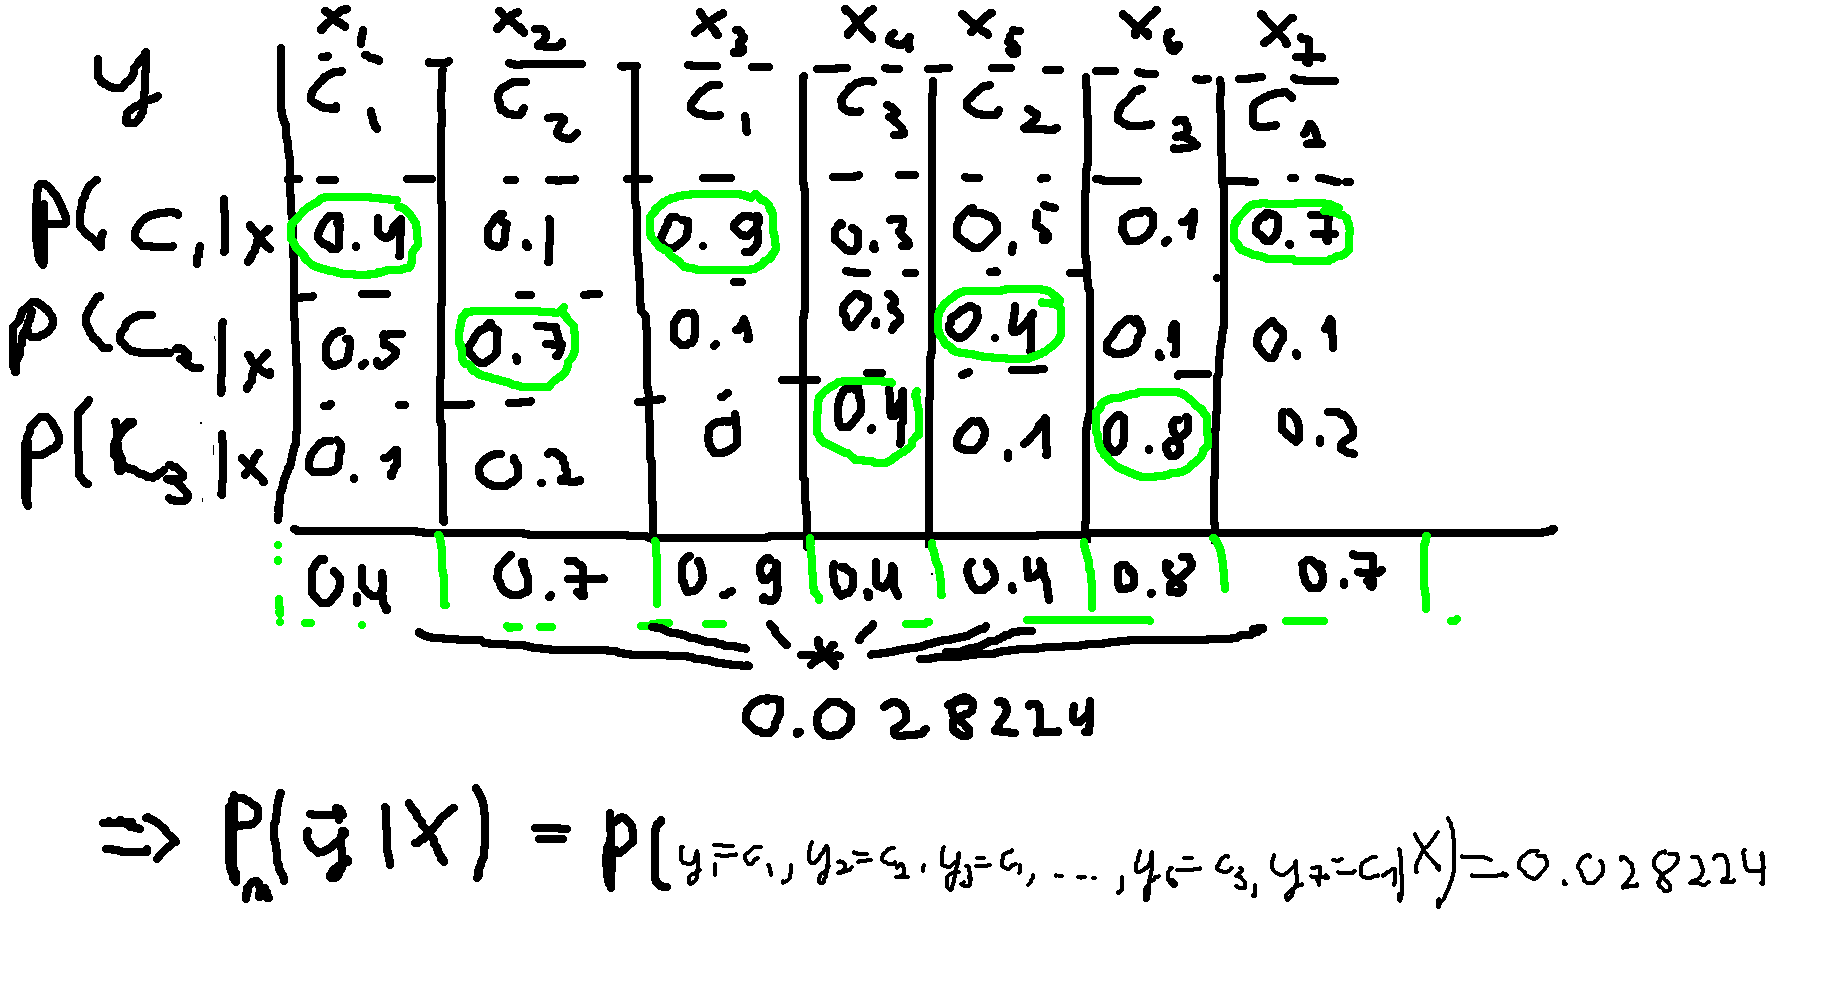

In [23]:
np.prod(pred_df['p_correct'])

4.817113684679115e-06

In [24]:
np.prod(np.max(probs,axis=1))

2.3681370071052892e-05

In [25]:
np.sum(np.log(pred_df['p_correct']))

-12.243335629872426

In [26]:
np.sum(np.log(np.max(probs,axis=1)))

-10.65082189189189

In [27]:
np.argmax(probs,axis=1)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0])

Напомним, что критерием для классификации мы назначали максимизацию правдоподобия последовательности корректных ответов

$$h^* = \underset{h}{\operatorname{argmax}}P_h(y_1,y_2,...,y_n|x_1,x_2,...,x_n) =  \underset{h}{\operatorname{argmax}}\prod_{i=1}^n P_h(y_i|x_i)$$ 
или, эквивалетно
$$h^* = \underset{h}{\operatorname{argmin}} -\frac{1}{n}\sum_{i=1}^n \log P_{h}(y_i|x_i)$$

Можно ли применить похожую формулу с регрессией? В таком случае наша модель должна предсказывать не точный ответ, а плотность его распределения. Например, модель линейной регрессии может считать, что ответы нормально распределены относительно линейной комбинации признаков:
$$p_h(y|\pmb{x}) = \mathcal{N}(y;\pmb{w}\cdot\pmb{x} + b, \sigma^2)$$
Тогда, по принципу макс. правдоподобия, мы ищем такие $\pmb{w}$ и $b$ (такое $h$), чтобы минимизировать величину:
$$h^* = \underset{\pmb{w},b}{\operatorname{argmin}} -\frac{1}{n}\sum_{i=1}^n \log P_{h}(y_i|x_i)$$
или
$$h^* = \underset{\pmb{w},b}{\operatorname{argmin}} -\frac{1}{n}\sum_{i=1}^n \log \mathcal{N}(y_i; \pmb{w}\cdot\pmb{x}^{(i)} + b, \sigma^2)$$

Рассмотрим один экземляр данных. Для него нам нужно минимизировать величину
$$- \log \mathcal{N}(y; \pmb{w}\cdot\pmb{x} + b, \sigma^2)$$

Ф-ия плотности нормального распределения имеет вид
$$p(x) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}$$

Подставим распределение для нашего случая
$$p(y|x) = \frac{e^{-(y - \pmb{w}\cdot\pmb{x} - b)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}$$

Прологарифмируем выражение
$$\log p(y|x) = \log \frac{1}{\sigma\sqrt{2\pi}} - \frac{(y - \pmb{w}\cdot\pmb{x} - b)^{2}}{(2\sigma^{2})}$$
И возьмем со знаком минус
$$-\log p(y|x) = -\log \frac{1}{\sigma\sqrt{2\pi}} + \frac{(y - \pmb{w}\cdot\pmb{x} - b)^{2}}{(2\sigma^{2})}$$

Учитывая, что $\pmb{w}$ и $b$ влияют только на второе слагаемое, максимизация правдоподобия с Гауссовой гипотезой эквивалентна методу наименьших квадратов

### Кросс-энтропия

Мы уже рассмотрели критерий negative-log-likelihood:
$$Q(h,X) = -\frac{1}{n}\sum_{i=1}^n \log P_{\text{model}}(y_i|x_i)$$

С точки зрения эмпирического риска это среднее функции потерь на одном экземпляре (log-loss)
$$L(x,y;h) = -\log P(y|x;h)$$
Т.е. функция потерь тем ниже, чем выше вероятность получить ответ $y$ для примера $x$ с использованием гипотезы $h$. Эта функция минимизируется, если предсказанная вероятность корректного ответа = 1.

Альтернативный взгляд на эту функцию даёт теория информации. Напомним, что в рамках этой теории, количество информации, которое несёт в себе *конкретное* значение $x$ случайной величины $X$ равняется:
$$I(x) = -\log P(x)$$
Ожидаемое количество информации, которое несет в себе случайно взятое значение $x$ величины $X$ называется *энтропией* $X$
$$H(X) = \mathbb{E}_{x \in X}I(X) = -\sum_{x \in X}P(x) \log P(x)$$


Мы измеряем количество информации, предполагая, что мы используем "кодировку", основанную на распределении $P(X)$. Именно знание $P(X)$ позволяет нам "выделять" $-\log P(x)$ единиц информации для значения $x$.

Однако часто мы не знаем истинного распределения $P(X)$. В таком случае, мы можем построить кодировку на основе другого распределения $Q(X)$, и попытаться приблизить $Q(X)$ к $P(X)$

В таком случае, мы будем кодировать события $x \sim P(X)$, кодировками размером $-\log Q(x)$. Тогда ожидаемое количество информации будет:
$$H(X; P || Q) = -\sum_{x \in X}P(x) \log Q(x)$$

Это общеизвестный факт, что независимо от распределения величина $H(X; P || Q)$ больше либо равна $H(X)$. Эта величина называется кросс-энтропией распределения P по Q. Если распределения P и Q одинаковы, кросс-энтропия P по Q равна энтропии P. В противном случае она больше. 

Минимизация кросс-энтропии заключается в том, что необходимо сделать Q как можно более похожим на P.

Теперь рассмотрим пример моделирования. Для одного примера данных $x$ корректный ответ $y =2$ (представим, что классов 4). Тогда эмпирическое распределение $P(y|x)$ можно записать следующим образом:
$$P_{data}(y|x) = \{0, 0, 1, 0\}$$ 
Пусть наша модель дала предсказание
$$P_h(y|x;h) = \{0.1,0.2,0.6,0.1\}$$
Тогда кросс-энтропия $P_{data}$ по $P_h$ равняется:
$$H(Y|x;P_{data}||P_h) = -\sum_{y \in Y}P_{data}(y|x) \log P_h(y|x) = \\ = -(0*\log0.1 + 0*\log0.2 + 1*\log{0.6} + 0*\log0.1) = -\log0.6$$ 


В большинстве случаев эмпирическое распределение $P_{data}(y|x)$ на одном экземпляре $x$ является разреженным (все вероятности, кроме вероятности корректного класса, равны нулю). Однако могут встречаться и не разреженные распределения (soft labels). Примеры:
- Вероятности представляют собой пропорции голосов за тот или иной класс от людей, проводивших разметку данных
- Вероятности проставлены другой моделью, а обучаемая модель учится повторять её предсказания. Такая ситуация встречается при попытках провести сжатие модели, т.е. обучить модель меньшего размера на основе модели большего размера, например, чтобы использовать её на мобильных устройствах. Выгода подхода по сравнению с обучением на исходных данных - способность сгенерировать больше примеров данных.

In [28]:
def cross_entropy(p,q,sparse=False):

    return -np.dot(p,np.log(q))


In [29]:
pp = np.array([0.2,0.6,0.2])

In [30]:
cross_entropy(pp,pp)

0.9502705392332347

In [32]:
cross_entropy(pp,np.array([0.2,0.55,0.25]))

0.9578486551641705

### Softmax-регрессия и многоклассования линейная классификация

In [35]:
np.array([4,7,-1,4.]) / np.sum(np.array([4,7,-1,4.]))

array([ 0.28571429,  0.5       , -0.07142857,  0.28571429])

В прошлый раз мы рассматривали бинарную классификацию на датасете MNIST. Мы выбирали положительный класс (например, цифра 4) и обучали бинарный классификатор отличать 4 от остальных цифр.

Многоклассовая классификация работает похожим образом.
Для каждого класса $c$ строится отдельная модель скоринга со своими параметрами.
$$z^{(c)} = \pmb{w}^{(c)} \cdot \pmb{x} + b^{(c)}$$

Далее, мы можем выбрать класс $c^*$, для которого $z^{(c)}  максимален$
$$c^* = \underset{c}{\operatorname{argmax}}\pmb{w}^{(c)} \cdot \pmb{x} + b^{(c)}$$

Если каждая модель строится как отдельный бинарный классификатор (например, для каждой цифры выучивается модель логистической регрессии с классами "искомая цифра", "остальные цифры", то такой подход называется One-vs-Rest

Однако этот подход не вероятностный и не предусматривает совместного обучения и оптимизации

Более принципиальный, вероятностный подход, называется softmax-регрессией

Модель предсказывает дискретное распределение $P_h(Y|x) = \{P_h(y=1|x), P_h(y=2|x), ...,P_h(y=N_c|x)\}$

Где $P_h(c|x) = \text{softmax}(z^{(c)}) = \Large{\frac{e^{z^{(c)}}}{\sum_{c' \in Y}e^{z^{(c')}}}}$

In [36]:
def softmax(z):
    exp = np.exp(z)
    return exp / np.sum(exp)

In [39]:
np.array([1,2,3]) / np.array([1,2,3]).sum()

array([0.16666667, 0.33333333, 0.5       ])

In [41]:
softmax(np.array([1,2,3]) * 3)

array([0.00235563, 0.04731416, 0.95033021])

Softmax позволяет преобразовать набор произвольных scor-ов в положительные числа в диапазоне 0..1, суммирующиеся в единицы

Итоговая модель:

Для каждого класса строится скоринговая функция $$z^{(c)} = \pmb{w}^{(c)} \cdot \pmb{x} + b^{(c)}$$

Значения скоринга преобразуются в вероятности:
$$\pmb{p} = \text{softmax}(\pmb{z})$$

При этом вектор скорингов можно получить одной матричной операцией:
$$\vec{z} = W\pmb{x} + \pmb{b};~~~ W \in \mathbb{R}^{N_c \times m}, ~b \in \mathbb{R}^{N_c} $$

Эмпирический риск получается:
$$-\frac{1}{n}\sum_{i=1}^n \log P_h(y_i|x_i) = -\frac{1}{n}\sum_{i=1}^n \sum_{c=1}^{N_c}[y_i = c]\log P_h(c|x_i)$$

In [42]:
from sklearn.datasets import fetch_openml

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [44]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [45]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

train_samples = 5000

X_train, X_test, y_train, y_test = train_test_split(

    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
clf=LogisticRegression(multi_class="multinomial",C=0.1)

In [47]:
clf.fit(X_train,y_train)

/home/stankin/general37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, multi_class='multinomial')

In [48]:
clf.coef_.shape

(10, 784)

In [49]:
scale = np.abs(clf.coef_).max()

In [50]:
from matplotlib import cm

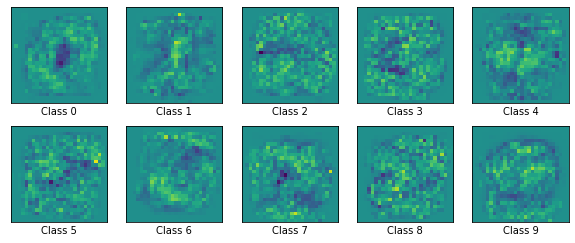

In [54]:
fig = plt.figure(figsize=((10,4)))
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(clf.coef_[i].reshape(28, 28), vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)

In [55]:
y_pred = clf.predict(X_test)

In [56]:
from sklearn import metrics

In [57]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       994
           1       0.94      0.97      0.96      1192
           2       0.88      0.87      0.88       994
           3       0.86      0.87      0.87       984
           4       0.90      0.89      0.89       895
           5       0.85      0.82      0.84       954
           6       0.93      0.93      0.93       970
           7       0.90      0.88      0.89      1047
           8       0.84      0.84      0.84       953
           9       0.86      0.87      0.87      1017

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [58]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [59]:
pd.DataFrame(conf_matrix, columns=["pred={}".format(x) for x in range(10)],
             index=["y={}".format(x) for x in range(10)])

,pred=0,pred=1,pred=2,pred=3,pred=4,pred=5,pred=6,pred=7,pred=8,pred=9
y=0,946,0,11,0,3,13,6,4,9,2
y=1,0,1162,4,6,1,6,1,1,11,0
y=2,6,10,866,24,12,12,21,14,23,6
y=3,1,12,27,856,0,27,5,17,23,16
y=4,5,8,10,1,793,3,10,7,10,48
y=5,15,4,8,53,14,785,18,8,43,6
y=6,6,5,16,0,12,18,906,0,7,0
y=7,4,6,15,16,18,4,0,924,7,53
y=8,9,21,14,27,7,41,8,8,802,16
y=9,11,6,8,8,23,10,0,46,16,889


In [63]:
from sklearn.metrics import pairwise

In [61]:
pd.DataFrame(pairwise.cosine_similarity(clf.coef_, clf.coef_), index=list(range(10)), columns=list(range(10)))

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.326814,0.032521,-0.151934,-0.254741,0.104768,0.001469,-0.051680,-0.049524,-0.202646
1,-0.326814,1.000000,0.017834,0.034383,-0.099225,-0.180662,-0.020307,-0.123525,-0.124569,-0.090827
2,0.032521,0.017834,1.000000,0.008864,-0.327262,-0.129070,0.009697,-0.171176,-0.151093,-0.295878
3,-0.151934,0.034383,0.008864,1.000000,-0.240322,-0.126555,-0.230491,-0.065858,-0.203921,-0.119259
4,-0.254741,-0.099225,-0.327262,-0.240322,1.000000,-0.074735,0.087211,-0.168574,-0.049601,0.090734
5,0.104768,-0.180662,-0.129070,-0.126555,-0.074735,1.000000,-0.125873,-0.115054,-0.172383,-0.193891
6,0.001469,-0.020307,0.009697,-0.230491,0.087211,-0.125873,1.000000,-0.288974,-0.128759,-0.175961
7,-0.051680,-0.123525,-0.171176,-0.065858,-0.168574,-0.115054,-0.288974,1.000000,-0.125268,0.056897
8,-0.049524,-0.124569,-0.151093,-0.203921,-0.049601,-0.172383,-0.128759,-0.125268,1.000000,-0.062257
9,-0.202646,-0.090827,-0.295878,-0.119259,0.090734,-0.193891,-0.175961,0.056897,-0.062257,1.000000


In [62]:
(-pairwise.cosine_similarity(clf.coef_, clf.coef_)).argsort(axis=1)

array([[0, 5, 2, 6, 8, 7, 3, 9, 4, 1],
       [1, 3, 2, 6, 9, 4, 7, 8, 5, 0],
       [2, 0, 1, 6, 3, 5, 8, 7, 9, 4],
       [3, 1, 2, 7, 9, 5, 0, 8, 6, 4],
       [4, 9, 6, 8, 5, 1, 7, 3, 0, 2],
       [5, 0, 4, 7, 6, 3, 2, 8, 1, 9],
       [6, 4, 2, 0, 1, 5, 8, 9, 3, 7],
       [7, 9, 0, 3, 5, 1, 8, 4, 2, 6],
       [8, 0, 4, 9, 1, 7, 6, 2, 5, 3],
       [9, 4, 7, 8, 1, 3, 6, 5, 0, 2]])

### Метрики классификации. Precision и Recall, f1. ROC

In [64]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       994
           1       0.94      0.97      0.96      1192
           2       0.88      0.87      0.88       994
           3       0.86      0.87      0.87       984
           4       0.90      0.89      0.89       895
           5       0.85      0.82      0.84       954
           6       0.93      0.93      0.93       970
           7       0.90      0.88      0.89      1047
           8       0.84      0.84      0.84       953
           9       0.86      0.87      0.87      1017

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [65]:
diabetes_df = pd.read_csv('diabetes.csv')

In [66]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='Count'>

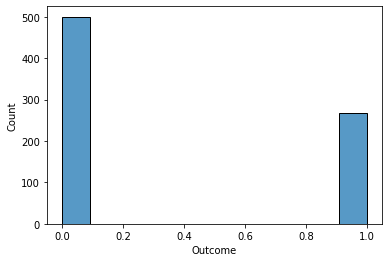

In [68]:
sns.histplot(data=diabetes_df,x='Outcome')

In [69]:
diabetes_df.shape

(768, 9)

In [70]:
diabetes_train, diabetes_test = train_test_split(diabetes_df, test_size=0.2, stratify=diabetes_df["Outcome"])

In [71]:
diabetes_train.shape

(614, 9)

In [72]:
def get_diabetes_X(df, scaler=None):
    np_arr = df.drop("Outcome", axis=1).values
    if scaler:
        return scaler.transform(np_arr)
    return np_arr

In [73]:
def get_diabetes_y(df):
    return df['Outcome'].values.astype(np.int)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler().fit(get_diabetes_X(diabetes_train))

In [76]:
dlr = LogisticRegression().fit(get_diabetes_X(diabetes_train, scaler), get_diabetes_y(diabetes_train))

In [77]:
dlr_pred = dlr.predict(get_diabetes_X(diabetes_test, scaler))

In [78]:
print(metrics.classification_report(get_diabetes_y(diabetes_test), dlr_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       100
           1       0.86      0.59      0.70        54

    accuracy                           0.82       154
   macro avg       0.84      0.77      0.79       154
weighted avg       0.83      0.82      0.82       154



In [79]:
from sklearn.model_selection import KFold

In [80]:
kfold = KFold(n_splits=5)

In [81]:
diabetes_train = diabetes_train.reset_index(drop=True)
diabetes_test = diabetes_test.reset_index(drop=True)

In [82]:
len(diabetes_train)

614

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
from tqdm.notebook import tqdm

In [85]:
models = []
f1_scores = []
accuracies = []
for train_indices, val_indices in tqdm(kfold.split(diabetes_train)):
    train_df = diabetes_train.iloc[train_indices]
    val_df = diabetes_train.iloc[val_indices]
    
    model = Pipeline([
        ('scaler',StandardScaler()),
        ('clf',LogisticRegression())
    ])
    
    model.fit(get_diabetes_X(train_df), get_diabetes_y(train_df))
    models.append(model)
    
    y_pred = model.predict(get_diabetes_X(val_df))
    f1 = metrics.f1_score(get_diabetes_y(val_df), y_pred)
    accuracy = metrics.accuracy_score(get_diabetes_y(val_df), y_pred)
    
    f1_scores.append(f1)
    accuracies.append(accuracy)

In [86]:
print(f1_scores)

[0.6666666666666666, 0.6578947368421053, 0.5526315789473685, 0.5757575757575758, 0.605263157894737]


In [87]:
print(accuracies)

[0.7560975609756098, 0.7886178861788617, 0.7235772357723578, 0.7723577235772358, 0.7540983606557377]


In [88]:
print(np.mean(accuracies))

0.7589497534319606


In [89]:
print(np.mean(f1_scores))

0.6116427432216905


In [90]:
for clf in models:
    y_pred = clf.predict(get_diabetes_X(diabetes_test))
    print(metrics.f1_score(get_diabetes_y(diabetes_test), y_pred))

0.6666666666666666
0.6813186813186813
0.6813186813186813
0.6813186813186813
0.6813186813186813


In [91]:
probs = None
for clf in models:
    if probs is None:
        probs = clf.predict_proba(get_diabetes_X(diabetes_test))
        print(probs.shape)
    else:
        probs += clf.predict_proba(get_diabetes_X(diabetes_test))
        
n_probs = probs / probs.sum(axis=1, keepdims=True)


(154, 2)


In [92]:
y_pred = n_probs.argmax(axis=1)
print(metrics.f1_score(get_diabetes_y(diabetes_test), y_pred))

0.7032967032967032


In [93]:
diabetes_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,108,80,0,0,27.0,0.259,52,1
1,4,114,64,0,0,28.9,0.126,24,0
2,2,111,60,0,0,26.2,0.343,23,0
3,1,87,68,34,77,37.6,0.401,24,0
4,6,108,44,20,130,24.0,0.813,35,0
...,...,...,...,...,...,...,...,...,...
149,2,146,76,35,194,38.2,0.329,29,0
150,0,161,50,0,0,21.9,0.254,65,0
151,9,184,85,15,0,30.0,1.213,49,1
152,0,131,88,0,0,31.6,0.743,32,1


In [94]:
probs = dlr.predict_proba(get_diabetes_X(diabetes_test,scaler))

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(get_diabetes_y(diabetes_test),probs[:,1])

Text(0, 0.5, 'True positive rate')

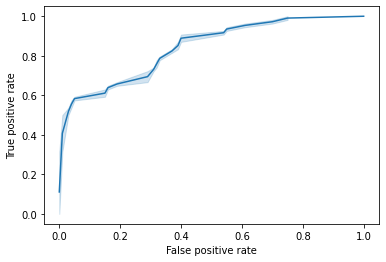

In [96]:
ax = sns.lineplot(x=fpr, y=tpr)
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [97]:
print(metrics.roc_auc_score(get_diabetes_y(diabetes_test),probs[:,1]))

0.8418518518518519


In [102]:
precision, recall, thresholds = metrics.precision_recall_curve(get_diabetes_y(diabetes_test),probs[:,1])

Text(0, 0.5, 'recall')

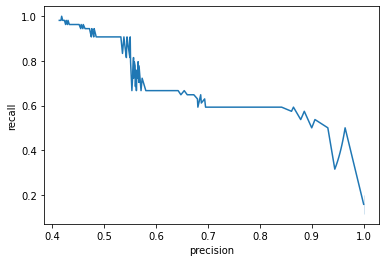

In [103]:
ax = sns.lineplot(x=precision, y=recall)
ax.set_xlabel('precision')
ax.set_ylabel('recall')

In [99]:
total = 0
greater = 0
for y_true1, y_score1 in zip(get_diabetes_y(diabetes_test), probs[:,1]):
    for y_true2, y_score2 in zip(get_diabetes_y(diabetes_test), probs[:,1]):
        if y_true1 > y_true2:
            total += 1
            if y_score1 > y_score2:
                greater += 1

In [101]:
 greater / total

0.8418518518518519